<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Análisis Exploratorio de Datos.</h2></font> 
<font color="#6E6E6E"><h2 align="left">Tarea 3. Natalidad vs Mortalidad.</h2></font> 

#### Regino Barranquero Cardeñosa, Marcelino Martínez Sober

+ Carga los ficheros “Babies per woman” y  “child Mortality” descargados previamente en 2 data frames de pandas. (https://www.gapminder.org/data/)  
+ Usa un variable `Year` que almacene el año que se quiere representar.
+ Realiza un diagrama de puntos (dispersión) de ambas variables para el año seleccionado, usando la representación por capas de seaborn objects, para aquellos países que aparezcan en ambos conjuntos
+ Prueba el funcionamiento para los años 1900,1969,1987
+ Modifica el código para que no se produzcan errores al intentar visualizar el año *1900*

#### Importamos el formato csv. Referencia

Importación Pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html


In [94]:
# Dependencias necesarias para s
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt	
from lets_plot import * # Cargamos toda las funciones de lets

# Configuración del gráfico 
#Dinámico
LetsPlot.setup_html()
#Estático
#LetsPlot.setup_html(isolated_frame=False, offline=True, no_js=True, show_status=True)


In [95]:
fertility = pd.read_csv('data/children_per_woman_total_fertility.csv',sep=",")
fertility.head()

#fertility.set_index('country') # Country será el index
print(fertility.index)

RangeIndex(start=0, stop=202, step=1)


In [96]:
mortality = pd.read_csv('data/child_mortality_0_5_year_olds_dying_per_1000_born.csv',sep=",")
mortality.head()
#mortality.set_index('country') # Country será el index
print(mortality.index)
mortality.head()

RangeIndex(start=0, stop=197, step=1)


country   1799   1800   1801   1802   1803   1804   1805  \
0           Afghanistan  469.0  469.0  469.0  469.0  469.0  469.0  470.0   
1                Angola  486.0  486.0  486.0  486.0  486.0  486.0  486.0   
2               Albania  375.0  375.0  375.0  375.0  375.0  375.0  375.0   
3               Andorra    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4  United Arab Emirates  434.0  434.0  434.0  434.0  434.0  434.0  434.0   

    1806   1807  ...   2091   2092   2093   2094   2095   2096   2097   2098  \
0  470.0  470.0  ...  12.60  12.40  12.20  12.00  11.80  11.60  11.50  11.30   
1  486.0  486.0  ...  17.70  17.50  17.30  17.10  17.00  16.80  16.60  16.40   
2  375.0  375.0  ...   2.32   2.30   2.27   2.24   2.22   2.19   2.16   2.14   
3    NaN    NaN  ...   0.86   0.84   0.83   0.81   0.80   0.79   0.78   0.77   
4  434.0  434.0  ...   2.31   2.29   2.26   2.24   2.22   2.19   2.17   2.15   

    2099   2100  
0  11.10  11.10  
1  16.30  16.30  
2   2.11   2.11  
3   0.76   0.76  
4   2.13   2.13  

[5 rows x 302 columns]

In [97]:
# Pruebas
mortality['country']

0               Afghanistan
1                    Angola
2                   Albania
3                   Andorra
4      United Arab Emirates
               ...         
192                   Samoa
193                   Yemen
194            South Africa
195                  Zambia
196                Zimbabwe
Name: country, Length: 197, dtype: object

In [98]:
# Varias formas de averiguar los países comunes
#Opcion1
PaisesComun = [x for x in list(mortality['country']) if x in list(fertility['country'])] # ASI 


In [99]:
#Opcion2 (Es igual que la 1 cambiando el modo de acceso.)
PaisesComunes1 = [x for x in list(mortality.loc[:,'country']) if x in list(fertility.loc[:,'country'])]
print(len(PaisesComunes1))




186


In [100]:
#Opcion3
# Obtención de paises comunes. La intersección está definida entre conjuntos
PaisesComunes3 = set(mortality['country']).intersection(set(fertility['country']))
print(len(PaisesComunes3))

186


In [101]:
fertility.head()

country  1799  1800  1801  1802  1803  1804  1805  1806  1807  \
0                 Aruba  5.64  5.64  5.64  5.64  5.64  5.64  5.64  5.64  5.64   
1           Afghanistan  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
2                Angola  6.93  6.93  6.93  6.93  6.93  6.93  6.93  6.94  6.94   
3               Albania  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
4  Netherlands Antilles  5.80  5.80  5.80  5.80  5.80  5.80  5.80  5.80  5.80   

   ...  2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  ...  1.82  1.82  1.82  1.82  1.82  1.82  1.82  1.82  1.83  1.83  
1  ...  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  
2  ...  2.54  2.52  2.50  2.48  2.47  2.45  2.43  2.42  2.40  2.40  
3  ...  1.78  1.78  1.78  1.79  1.79  1.79  1.79  1.79  1.79  1.79  
4  ...  2.00  2.00  2.01  2.01  2.01  2.01  2.01  2.02  2.02  2.02  

[5 rows x 302 columns]

In [102]:
# Otra forma más
fertility.head()
PaisesComunes3 =list()
CountryFer=list(fertility.country)

for x in mortality.loc[:,'country']:
    #print('x=',x)
    if x in CountryFer:
        #print('Este')
        PaisesComunes3.append(x)
    
print(len(PaisesComunes3))


year='1969'
#fertility[fertility[:,'country'] in PaisesComunes1,fertility.loc[:,year]]
fertility.loc[:,['country']] 


186


country
0                   Aruba
1             Afghanistan
2                  Angola
3                 Albania
4    Netherlands Antilles
..                    ...
197                 Samoa
198                 Yemen
199          South Africa
200                Zambia
201              Zimbabwe

[202 rows x 1 columns]

Usando fusión de 2 data frames

In [103]:
# Fusion usando melt usando como referencia country realizando la operación 'inner_join'
# Dado que las columnas se llaman igual se añade x o y para indicar si procede del primero o del segundo df
year='1969'
df=pd.merge(mortality.loc[:,['country',year]],fertility.loc[:,['country',year]],how='inner',on='country')
print(type(df))
display(df)

<class 'pandas.core.frame.DataFrame'>


country  1969_x  1969_y
0             Afghanistan   308.0    7.45
1                  Angola   275.0    7.60
2                 Albania   131.0    5.06
3    United Arab Emirates   107.0    6.71
4               Argentina    72.8    3.06
..                    ...     ...     ...
181                 Samoa   105.0    7.27
182                 Yemen   339.0    7.79
183          South Africa   156.0    5.72
184                Zambia   184.0    7.35
185              Zimbabwe   117.0    7.42

[186 rows x 3 columns]

In [104]:
df.rename(columns={year+'_x':'Mortality',year+'_y':'Fertility'},inplace=True) # OJO CON NO INDICAR inplace=True, sino no lo cambia aunque asignemos el resultado
df.head()



country  Mortality  Fertility
0           Afghanistan      308.0       7.45
1                Angola      275.0       7.60
2               Albania      131.0       5.06
3  United Arab Emirates      107.0       6.71
4             Argentina       72.8       3.06

In [105]:
import seaborn.objects as so

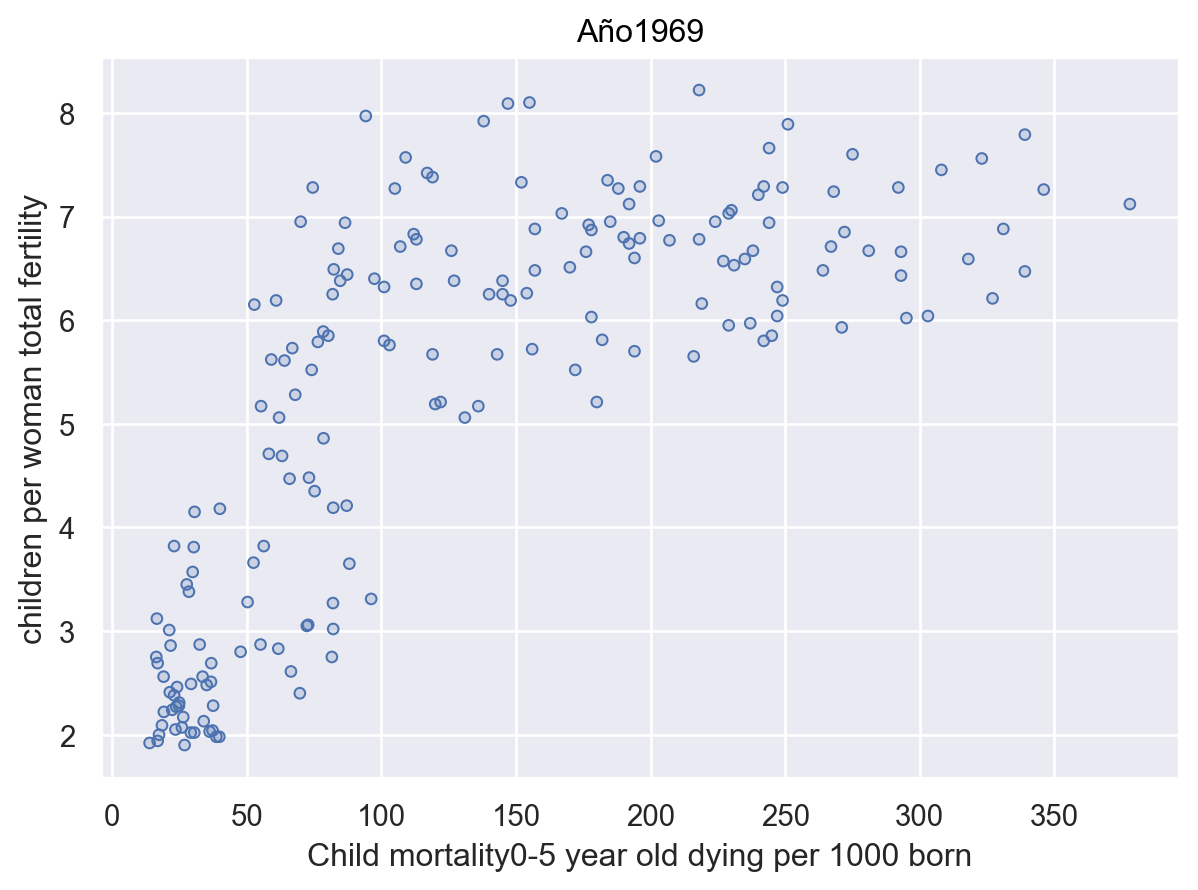

In [106]:
(
    so.Plot(data=df,x='Mortality',y='Fertility')
    .add(so.Dots())
    .label(
        x="Child mortality0-5 year old dying per 1000 born", y="children per woman total fertility",
        #color=str.capitalize,
        title="Año" + year
    )

)

Con un bucle los generamos para todos los años

El año 1900 no está disponible


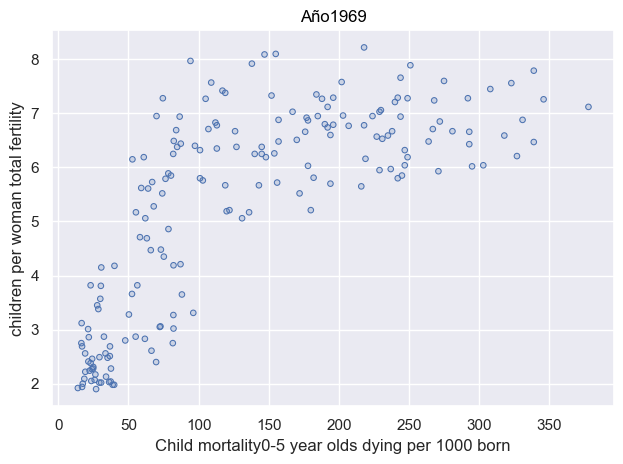

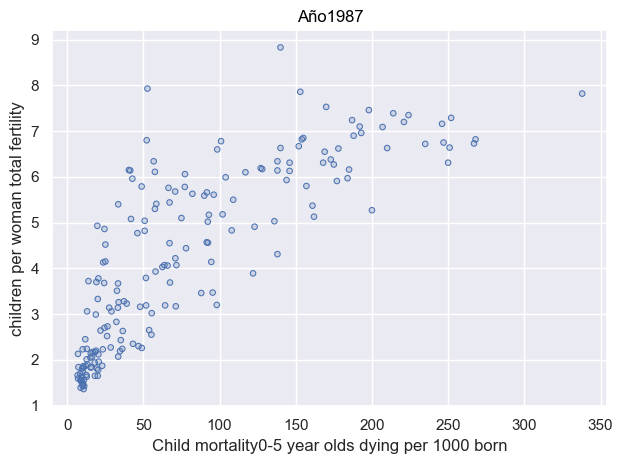

In [107]:

Years = [1900,1969,1987]
for year in Years:
    
    year=str(year)
    
    #print(year)
    try:
        df=pd.merge(mortality.loc[:,['country',year]],fertility.loc[:,['country',year]],how='inner',on='country')   
        df.rename(columns={year+'_x':'Mortality',year+'_y':'Fertility'},inplace=True) # OJO CON NO INDICAR inplace=True, sino no lo cambia auque asignemos el resultado
        p=(
        so.Plot(data=df,x='Mortality',y='Fertility')
        .add(so.Dots())
        .label(
            x="Child mortality0-5 year olds dying per 1000 born", y="children per woman total fertility",
            color=str.capitalize,
            title="Año" + year
        )

        )
        p.show()
    except:
        print(f'El año {year} no está disponible')
        
    

# EXTRA

Ejercicio: Representa la serie temporal de la evolución de la fertilidad en 'Spain'

Revisa el la documentación `pd.melt` + `pd.concat`  y reorganiza los datos en un data frame, con los paises comunes que tenga por columnas `country Year Mortality Fertility` 

In [108]:
# Otra forma

M=mortality.loc[mortality['country'].isin(PaisesComunes3),:]
F=fertility.loc[fertility['country'].isin(PaisesComunes3),:]
DF1 =M.melt(id_vars='country',var_name='Year',value_name='Mortalidad')
DF2 =F.melt(id_vars='country',var_name='Year',value_name='Fertility')
df = pd.concat([DF1,DF2]).reset_index(drop=True)

# Puedeo selecionar Pais
df[df.country=='Spain']


# Puedo selecionar Año
display(df.info())
df[df.Year=='1969'] # Como cadena de texto

# Tipo numérico
df.Year =df.Year.astype(int)
display(df.info())

df[df.Year==1969] # Como numero


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111972 entries, 0 to 111971
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   country     111972 non-null  object 
 1   Year        111972 non-null  object 
 2   Mortalidad  55836 non-null   float64
 3   Fertility   55986 non-null   float64
dtypes: float64(2), object(2)
memory usage: 3.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111972 entries, 0 to 111971
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   country     111972 non-null  object 
 1   Year        111972 non-null  int64  
 2   Mortalidad  55836 non-null   float64
 3   Fertility   55986 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.4+ MB


None

country  Year  Mortalidad  Fertility
31434           Afghanistan  1969       308.0        NaN
31435                Angola  1969       275.0        NaN
31436               Albania  1969       131.0        NaN
31437  United Arab Emirates  1969       107.0        NaN
31438             Argentina  1969        72.8        NaN
...                     ...   ...         ...        ...
87601                 Samoa  1969         NaN       7.27
87602                 Yemen  1969         NaN       7.79
87603          South Africa  1969         NaN       5.72
87604                Zambia  1969         NaN       7.35
87605              Zimbabwe  1969         NaN       7.42

[372 rows x 4 columns]

Ejercicio: Representa la serie temporal de la evolución de la fertilidad en 'Spain'

In [109]:

Pais = 'Spain'
YearMin = 1900
YearMax = 2023
ggplot(data =df[(df.country==Pais) & (df.Year >=YearMin) & (df.Year <= YearMax)],mapping=aes(x='Year',y='Fertility'))+ geom_line()+geom_point()+labs(title='Fertility'+Pais)

In [110]:
Paises = ('Spain','France','Portugal')
YearMin = 1940
YearMax = 1980

(
ggplot(data =df[(df.country.isin(Paises)) & (df.Year >=YearMin) & (df.Year <= YearMax)],mapping=aes(x='Year',y='Fertility',color='country'))+ 
geom_line()+
geom_point(data =df[(df.country.isin(Paises)) & (df.Year >=1950) & (df.Year <= 1975)],mapping=aes(x='Year',y='Fertility',color='country')) +
labs(title='Baby boom' ) +
geom_vline(xintercept=1950,color='black') +
geom_vline(xintercept=1975,color='black',size=2)
)

In [111]:
Paises = ('Spain','France','Portugal','China','India')
YearMin = 1940
YearMax = 1980

(
ggplot(data =df[(df.country.isin(Paises)) & (df.Year >=YearMin) & (df.Year <= YearMax)],mapping=aes(x='Year',y='Fertility',color='country'))+ 
geom_line()+
geom_point(data =df[(df.country.isin(Paises)) & (df.Year >=1950) & (df.Year <= 1975)],mapping=aes(x='Year',y='Fertility',color='country')) +
labs(title='Baby boom' ) +
geom_vline(xintercept=1950,color='black') +
geom_vline(xintercept=1975,color='black',size=2)
)

https://www.cairn-int.info/article-E_POPU_1202_0329--the-demography-of-china-s-1958-61-famine.htm
Demographic consequences of China’s 1958-61 famine and demographic responses